In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_excel('Data_gabungan_Completed_sorted_by_tahun.xlsx')

print(f"ukuran dataset: {df.shape} baris, {df.shape} kolom")

ukuran dataset: (111, 13) baris, (111, 13) kolom


In [3]:
print(df.dtypes)

Tahun                                              int64
Provinsi                                          object
Upah Minimum (Rp)                                  int64
Pencari Kerja Terdaftar - Laki-Laki                int64
Pencari Kerja Terdaftar - Perempuan              float64
Pencari Kerja Terdaftar - Jumlah                 float64
Lowongan Kerja Terdaftar - Laki-Laki               int64
Lowongan Kerja Terdaftar - Perempuan             float64
Lowongan Kerja Terdaftar - Jumlah                float64
Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki    float64
Penempatan/Pemenuhan Tenaga Kerja - Perempuan    float64
Penempatan/Pemenuhan Tenaga Kerja - Jumlah         int64
Penempatan                                         int64
dtype: object


In [4]:
print(df.head(10))

   Tahun       Provinsi  Upah Minimum (Rp)  \
0   2022           Aceh            3166460   
1   2022           Bali            2516971   
2   2022         Banten            2501203   
3   2022       Bengkulu            2238094   
4   2022  DI Yogyakarta            1840915   
5   2022    DKI Jakarta            4641854   
6   2022      Gorontalo            2800580   
7   2022          Jambi            2698940   
8   2022     Jawa Barat            1841487   
9   2022    Jawa Tengah            1812935   

   Pencari Kerja Terdaftar - Laki-Laki  Pencari Kerja Terdaftar - Perempuan  \
0                                 6515                               5085.0   
1                                 6919                               4932.0   
2                                35076                              23702.0   
3                                 2152                               2094.0   
4                                 7212                               6098.0   
5                  

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tahun                                          111 non-null    int64  
 1   Provinsi                                       111 non-null    object 
 2   Upah Minimum (Rp)                              111 non-null    int64  
 3   Pencari Kerja Terdaftar - Laki-Laki            111 non-null    int64  
 4   Pencari Kerja Terdaftar - Perempuan            111 non-null    float64
 5   Pencari Kerja Terdaftar - Jumlah               111 non-null    float64
 6   Lowongan Kerja Terdaftar - Laki-Laki           111 non-null    int64  
 7   Lowongan Kerja Terdaftar - Perempuan           111 non-null    float64
 8   Lowongan Kerja Terdaftar - Jumlah              111 non-null    float64
 9   Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki  111 non

In [7]:
print(df.describe())

           Tahun  Upah Minimum (Rp)  Pencari Kerja Terdaftar - Laki-Laki  \
count   111.0000       1.110000e+02                           111.000000   
mean   2023.0000       2.759848e+06                         19295.108108   
std       0.8202       8.937606e+05                         38525.606081   
min    2022.0000       0.000000e+00                           100.000000   
25%    2022.0000       2.442276e+06                          3578.000000   
50%    2023.0000       2.862231e+06                          7227.000000   
75%    2024.0000       3.272039e+06                         14658.500000   
max    2024.0000       5.067381e+06                        296917.000000   

       Pencari Kerja Terdaftar - Perempuan  Pencari Kerja Terdaftar - Jumlah  \
count                           111.000000                        111.000000   
mean                          14615.747748                      33911.572072   
std                           33187.097855                      71393.49445

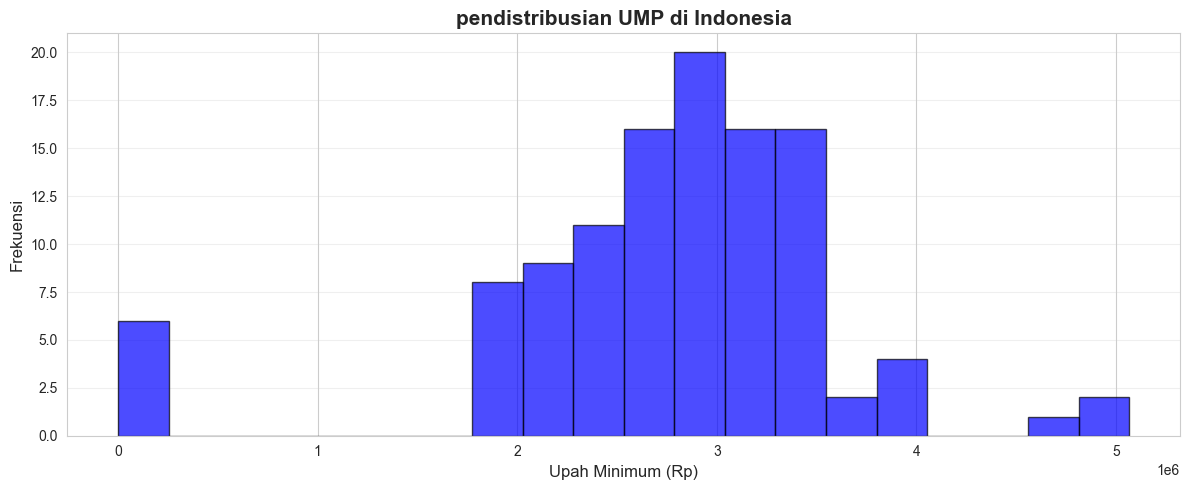

In [6]:
plt.figure(figsize=(12, 5))
plt.hist(df['Upah Minimum (Rp)'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Upah Minimum (Rp)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('pendistribusian UMP di Indonesia', fontsize=15, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('bar_chart_distribusi_UMP.png', dpi=300, bbox_inches='tight')
plt.show()

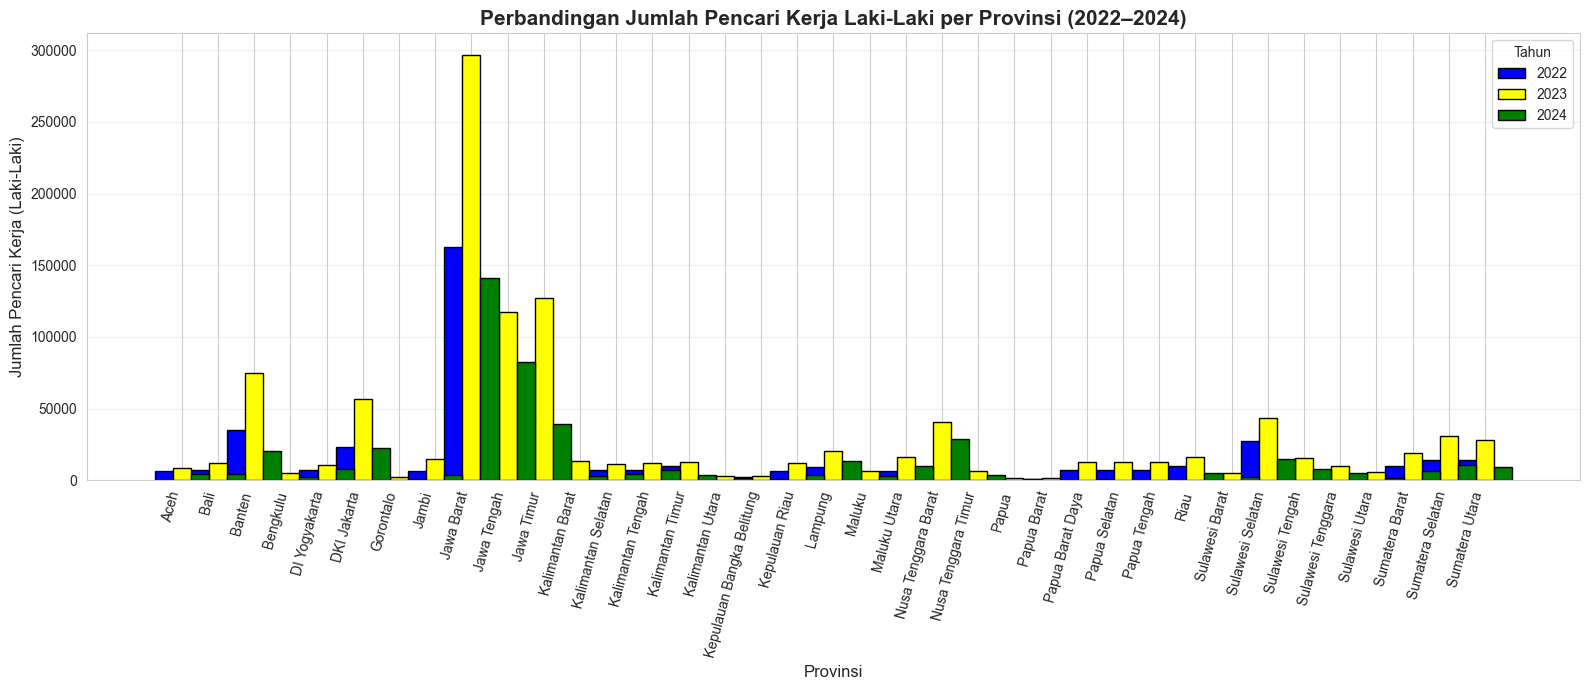

In [7]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Pencari Kerja Terdaftar - Laki-Laki',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.5

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Pencari Kerja (Laki-Laki)', fontsize=12)
plt.title('Perbandingan Jumlah Pencari Kerja Laki-Laki per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Pencari_Kerja_Laki_Laki_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

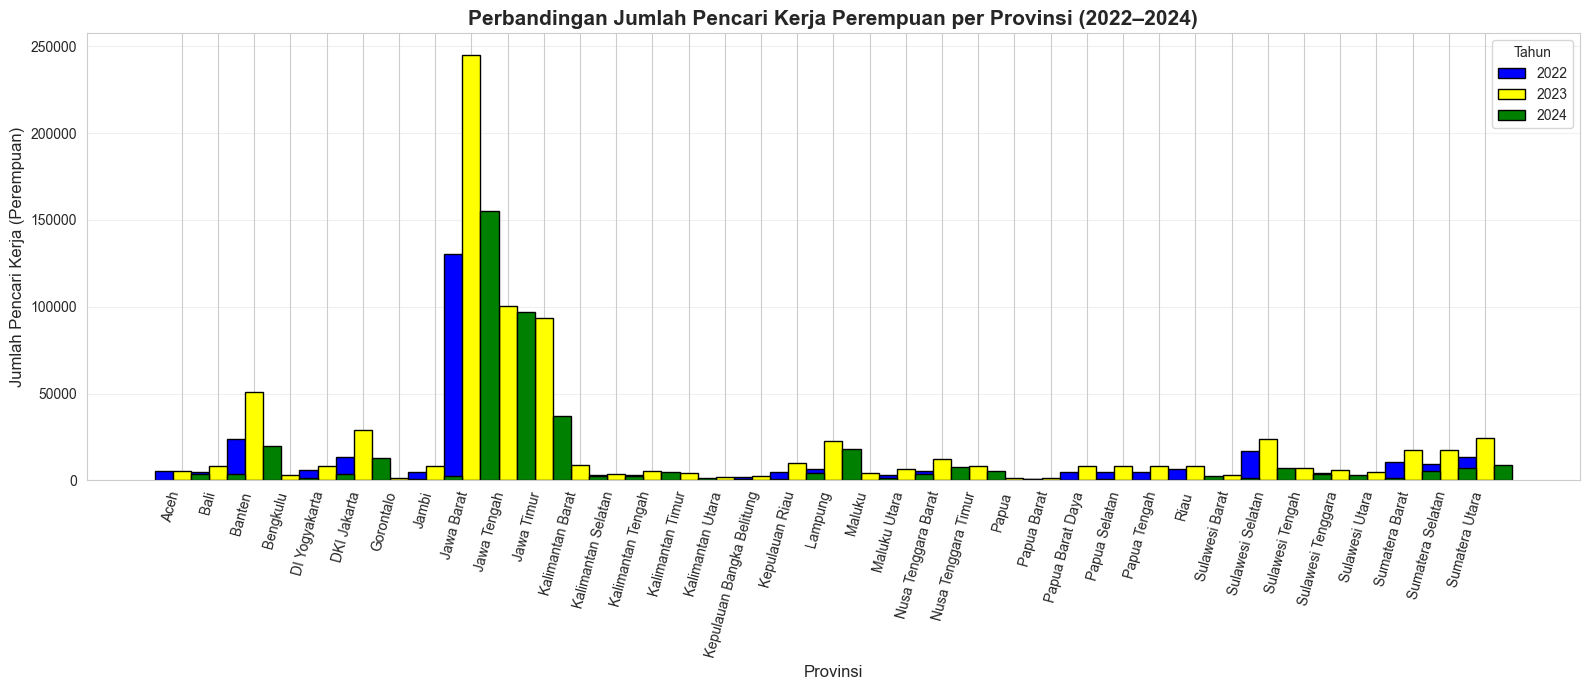

In [8]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Pencari Kerja Terdaftar - Perempuan',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.5

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Pencari Kerja (Perempuan)', fontsize=12)
plt.title('Perbandingan Jumlah Pencari Kerja Perempuan per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Pencari_Kerja_Perempuan_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

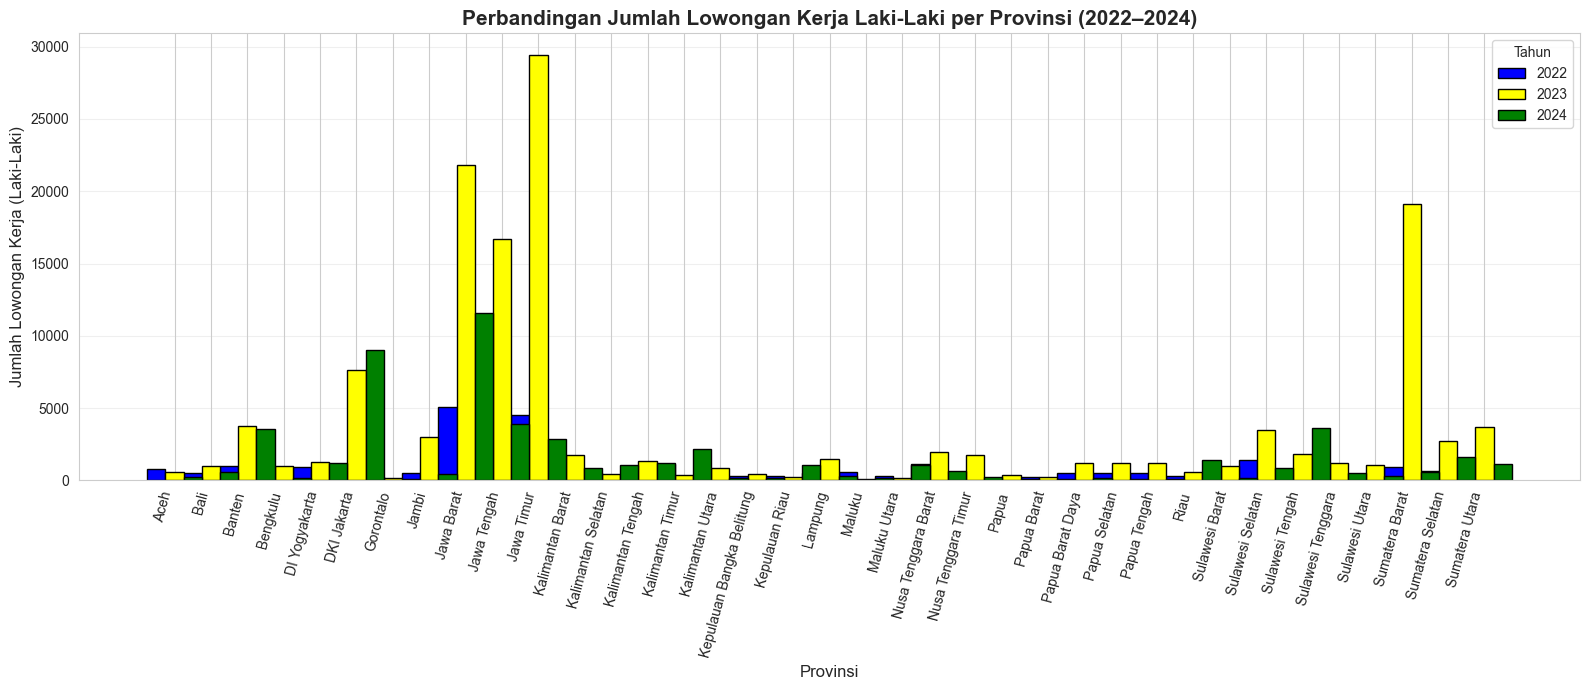

In [9]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Lowongan Kerja Terdaftar - Laki-Laki',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.5

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Lowongan Kerja (Laki-Laki)', fontsize=12)
plt.title('Perbandingan Jumlah Lowongan Kerja Laki-Laki per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Lowongan_Kerja_Laki_Laki_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

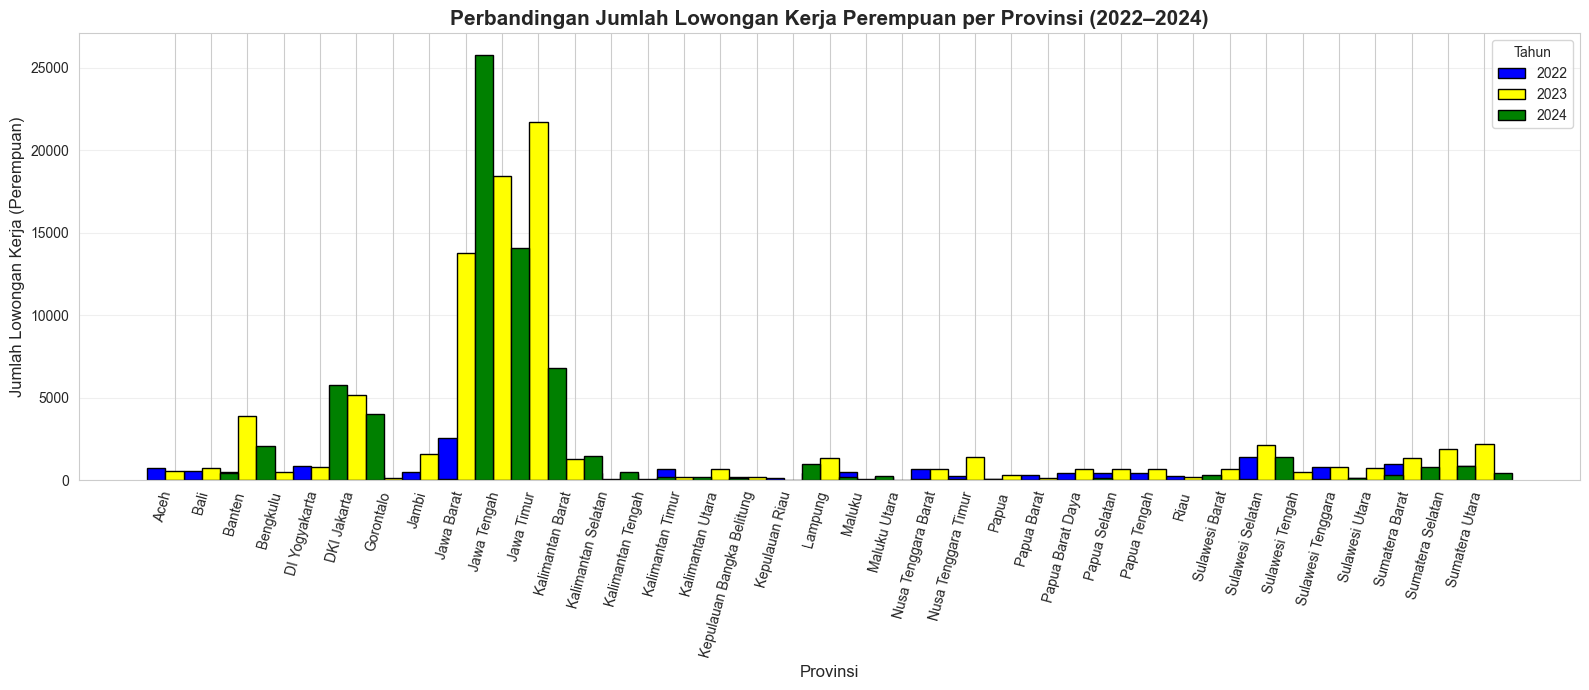

In [10]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Lowongan Kerja Terdaftar - Perempuan',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.5

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Lowongan Kerja (Perempuan)', fontsize=12)
plt.title('Perbandingan Jumlah Lowongan Kerja Perempuan per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Lowongan_Kerja_Perempuan_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

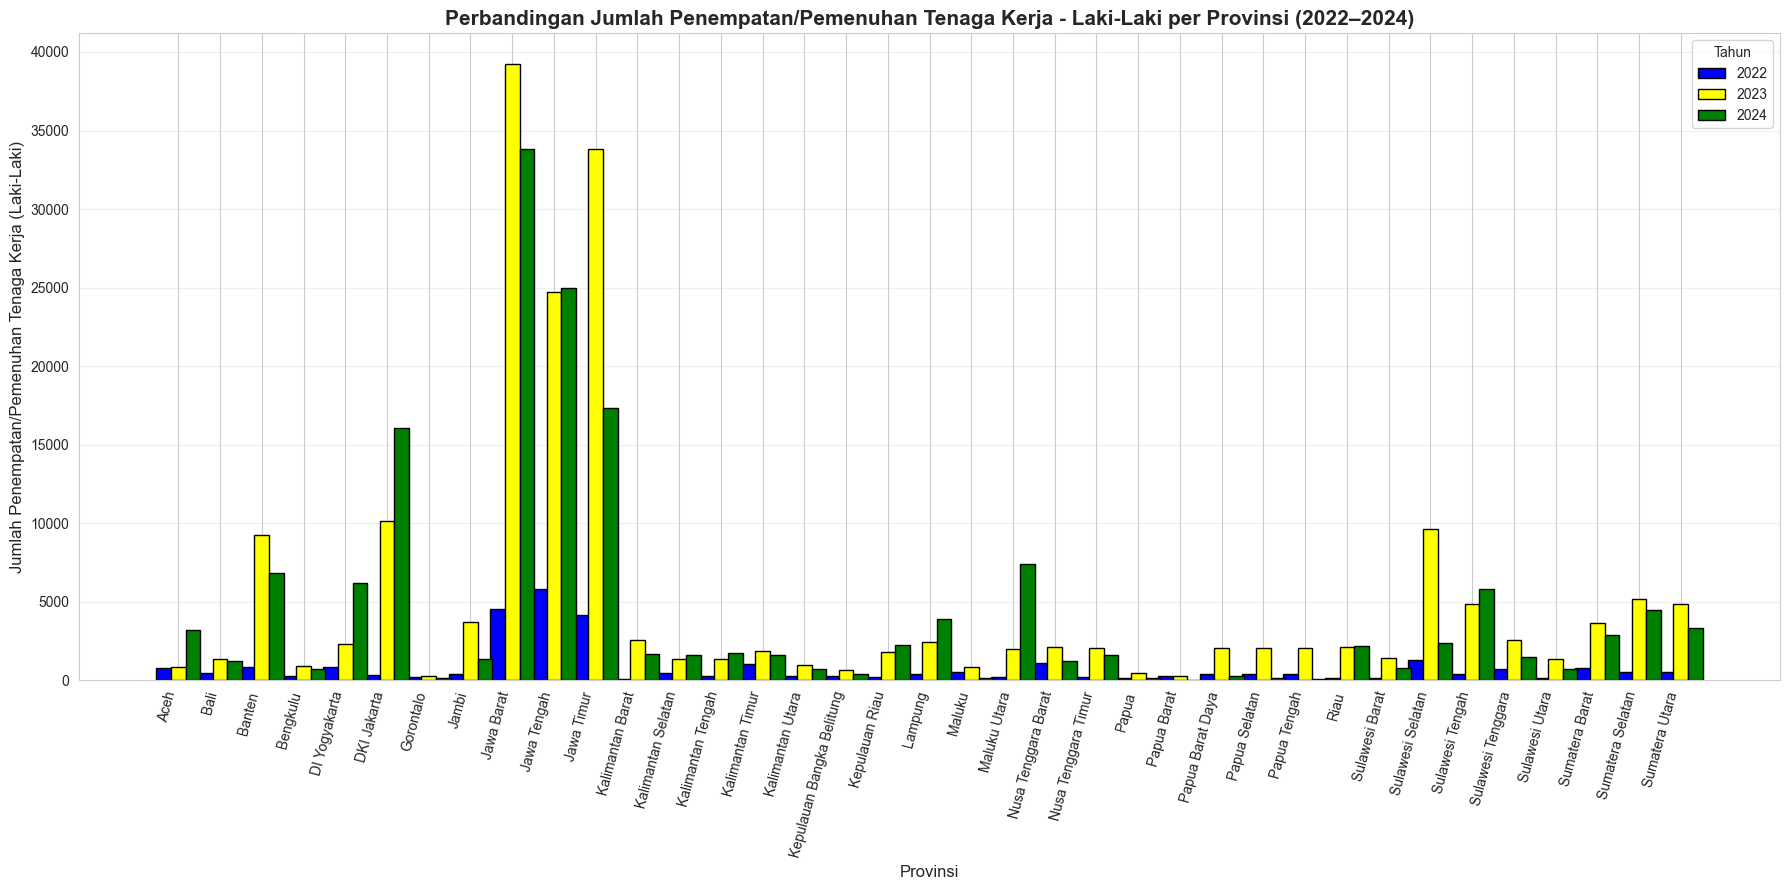

In [11]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.35

plt.figure(figsize=(18, 9))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Penempatan/Pemenuhan Tenaga Kerja (Laki-Laki)', fontsize=12)
plt.title('Perbandingan Jumlah Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Penempatan_Kerja_Laki-laki_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

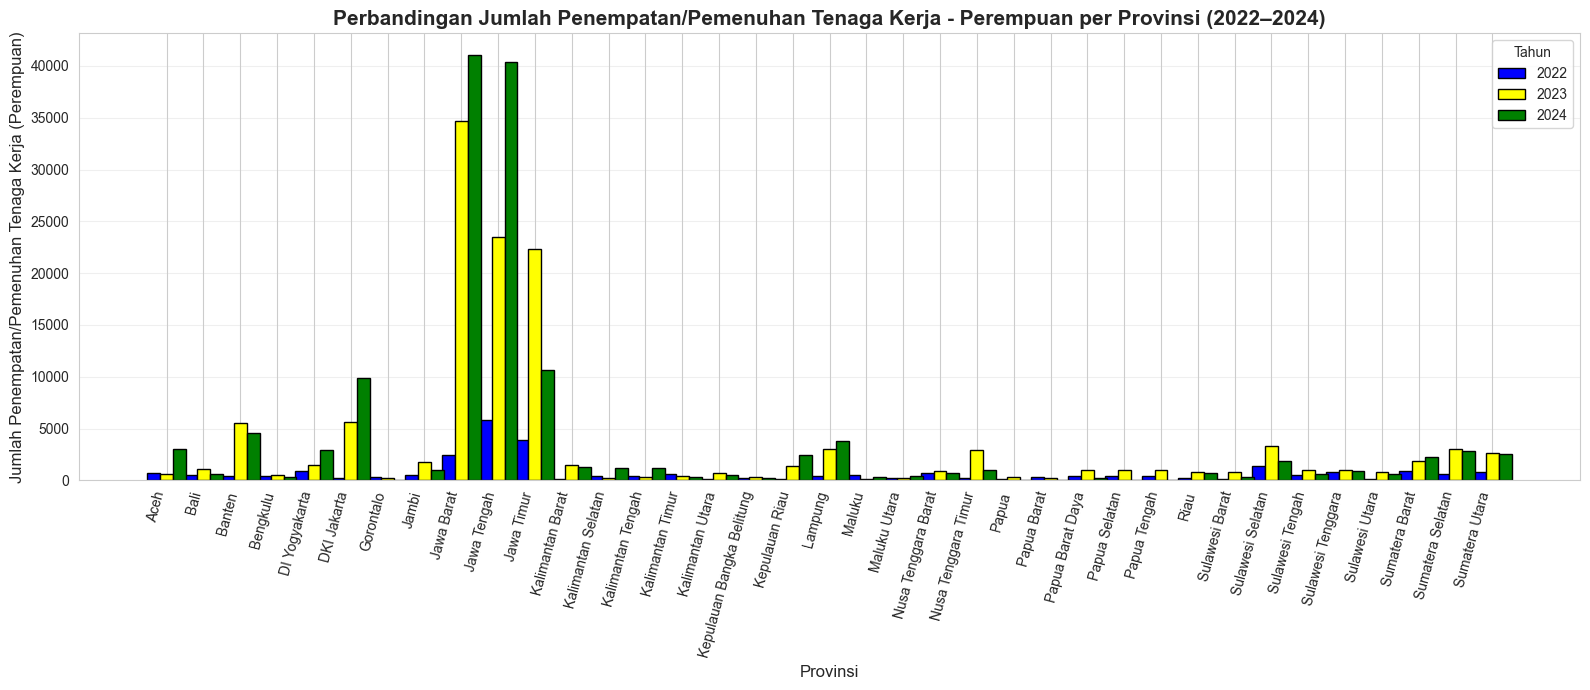

In [12]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Penempatan/Pemenuhan Tenaga Kerja - Perempuan',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.35

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Penempatan/Pemenuhan Tenaga Kerja (Perempuan)', fontsize=12)
plt.title('Perbandingan Jumlah Penempatan/Pemenuhan Tenaga Kerja - Perempuan per Provinsi (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Penempatan_Kerja_Perempuan_per_Provinsi.png', dpi=300, bbox_inches='tight')
plt.show()

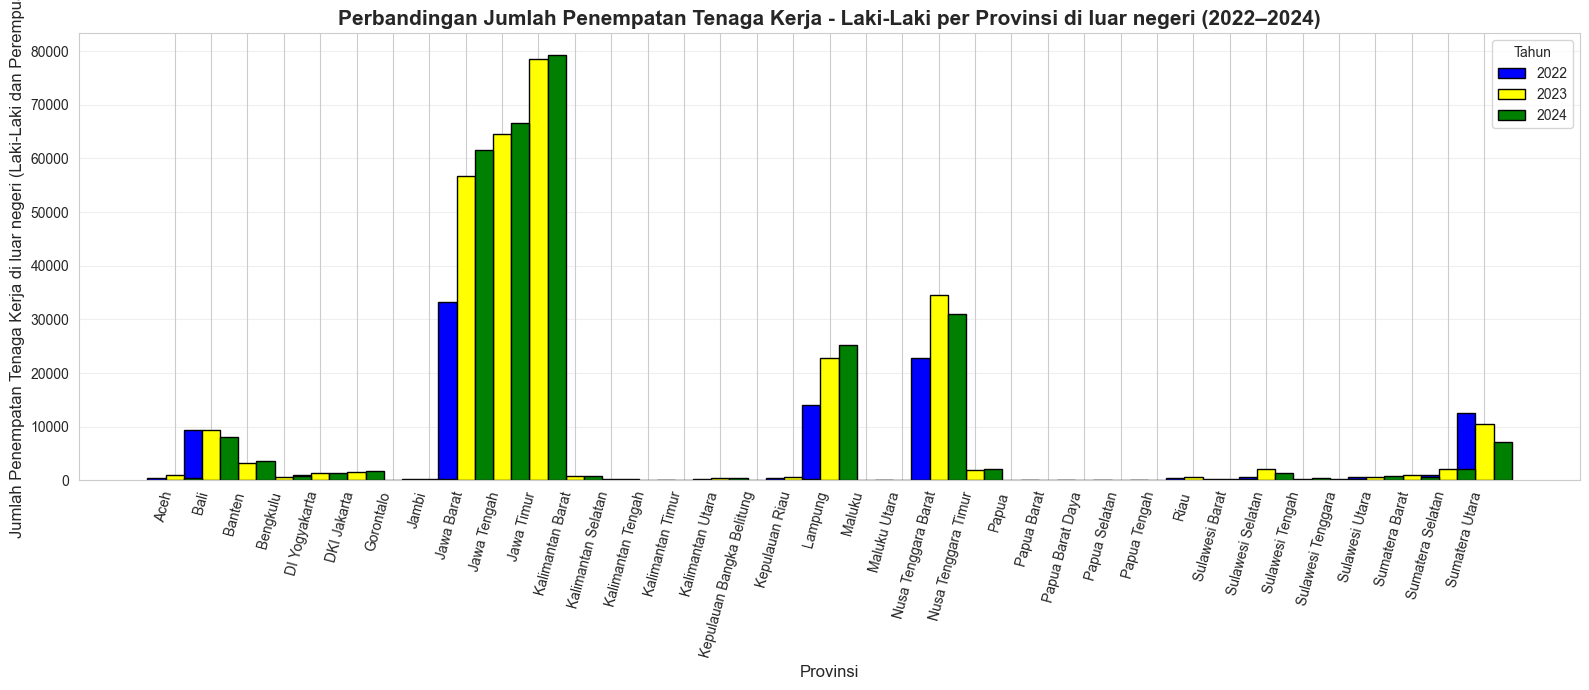

In [13]:
data_pivot = df.pivot_table(
    index='Provinsi',
    columns='Tahun',
    values='Penempatan',
    aggfunc='sum'
)

data_pivot = data_pivot[[2022, 2023, 2024]]

provinsi = np.arange(len(data_pivot.index))
bar_width = 0.5

plt.figure(figsize=(16, 7))

plt.bar(provinsi - bar_width, data_pivot[2022], width=bar_width, color='blue', label='2022', edgecolor='black')
plt.bar(provinsi, data_pivot[2023], width=bar_width, color='yellow', label='2023', edgecolor='black')
plt.bar(provinsi + bar_width, data_pivot[2024], width=bar_width, color='green', label='2024', edgecolor='black')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Penempatan Tenaga Kerja di luar negeri (Laki-Laki dan Perempuan)', fontsize=12)
plt.title('Perbandingan Jumlah Penempatan Tenaga Kerja - Laki-Laki per Provinsi di luar negeri (2022–2024)', fontsize=15, fontweight='bold')
plt.xticks(provinsi, data_pivot.index, rotation=75, ha='right')
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('Bar_Chart_Penempatan_Kerja_per_Provinsi_di_luar_negeri.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

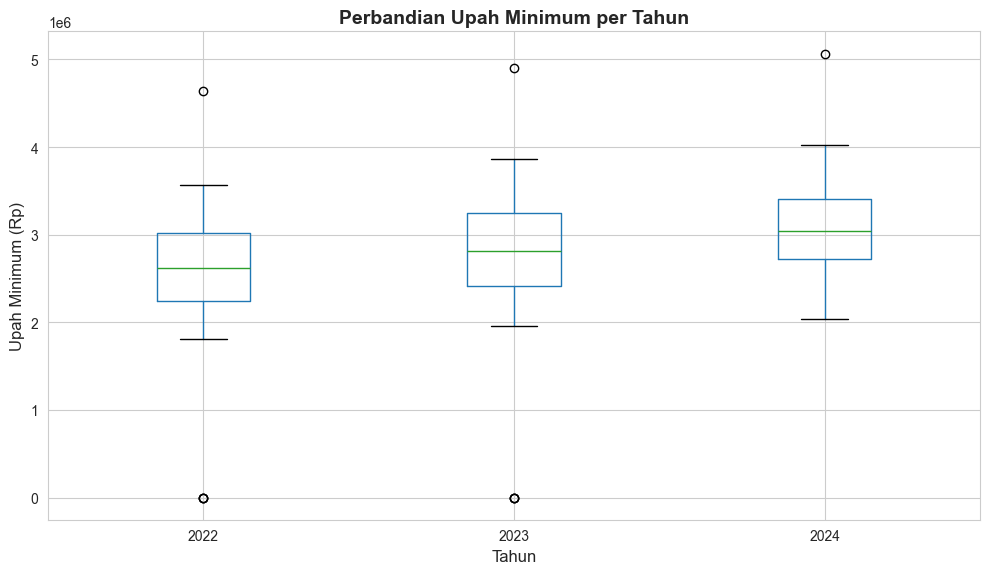

In [4]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Upah Minimum (Rp)', by='Tahun', figsize=(10,6))
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Upah Minimum (Rp)', fontsize=12)
plt.title('Perbandian Upah Minimum per Tahun', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.tight_layout()
plt.savefig('boxplot_UMP.png', dpi=300, bbox_inches='tight')
plt.show()

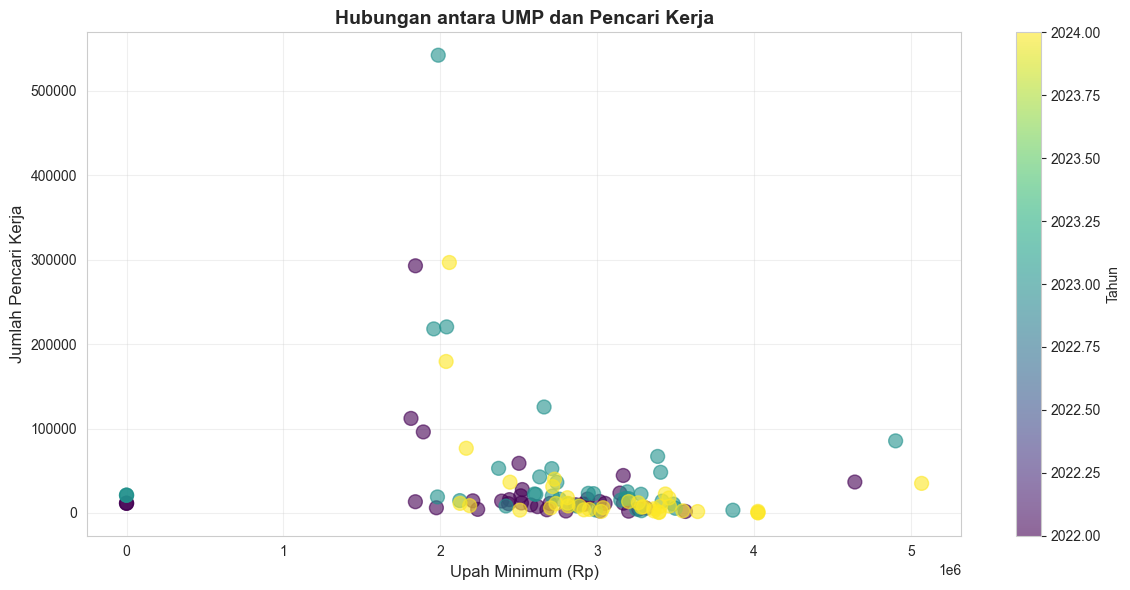

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(df['Upah Minimum (Rp)'], df['Pencari Kerja Terdaftar - Jumlah'], alpha=0.6, s=100, c=df['Tahun'], cmap='viridis')
plt.xlabel('Upah Minimum (Rp)', fontsize=12)
plt.ylabel('Jumlah Pencari Kerja', fontsize=12)
plt.title('Hubungan antara UMP dan Pencari Kerja', fontsize=14, fontweight='bold')
plt.colorbar(label='Tahun')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('UMP vs Pencari Kerja.png', dpi=300, bbox_inches='tight')
plt.show()

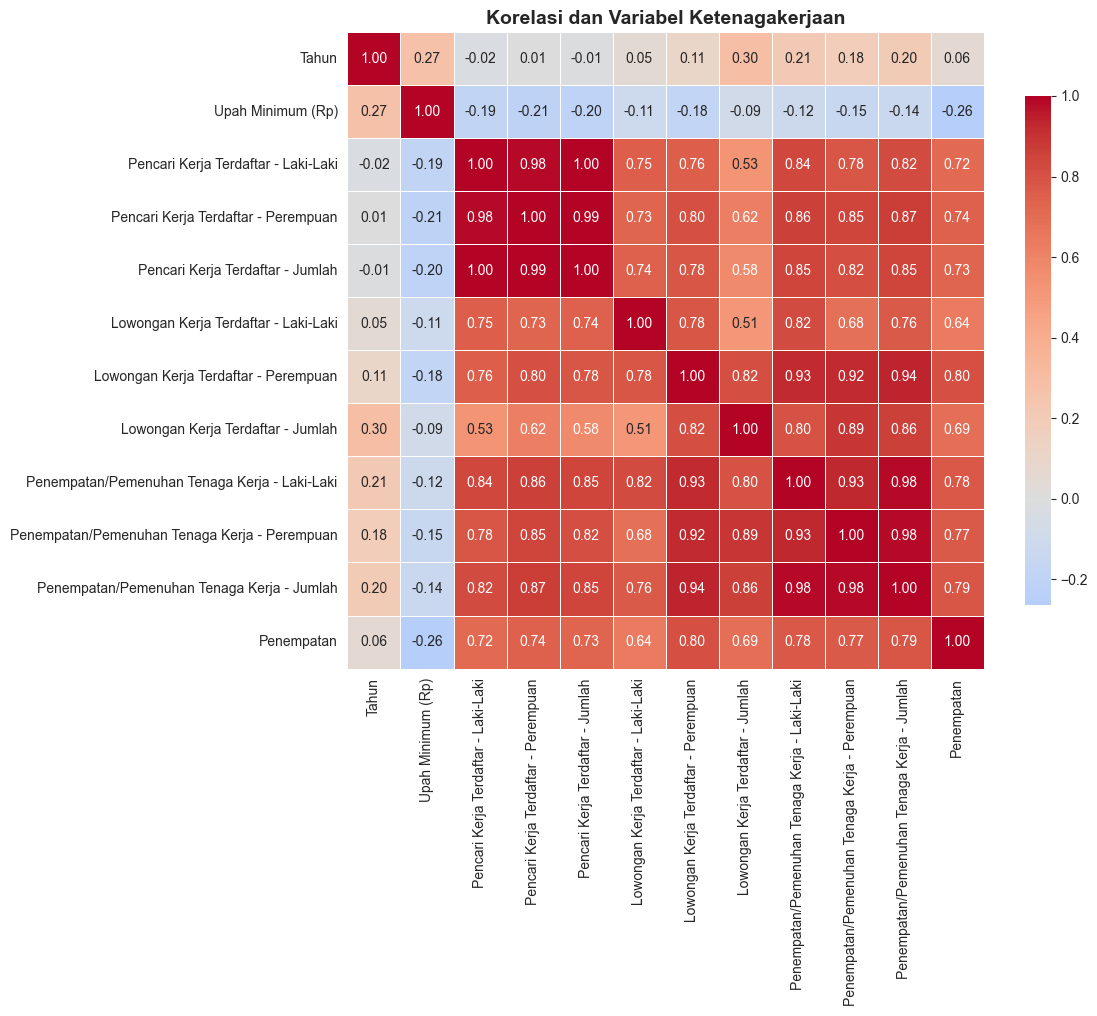

In [14]:
plt.figure(figsize=(12,10))
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix=df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Korelasi dan Variabel Ketenagakerjaan', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Heat_Map.png', dpi=300, bbox_inches='tight')
plt.show()

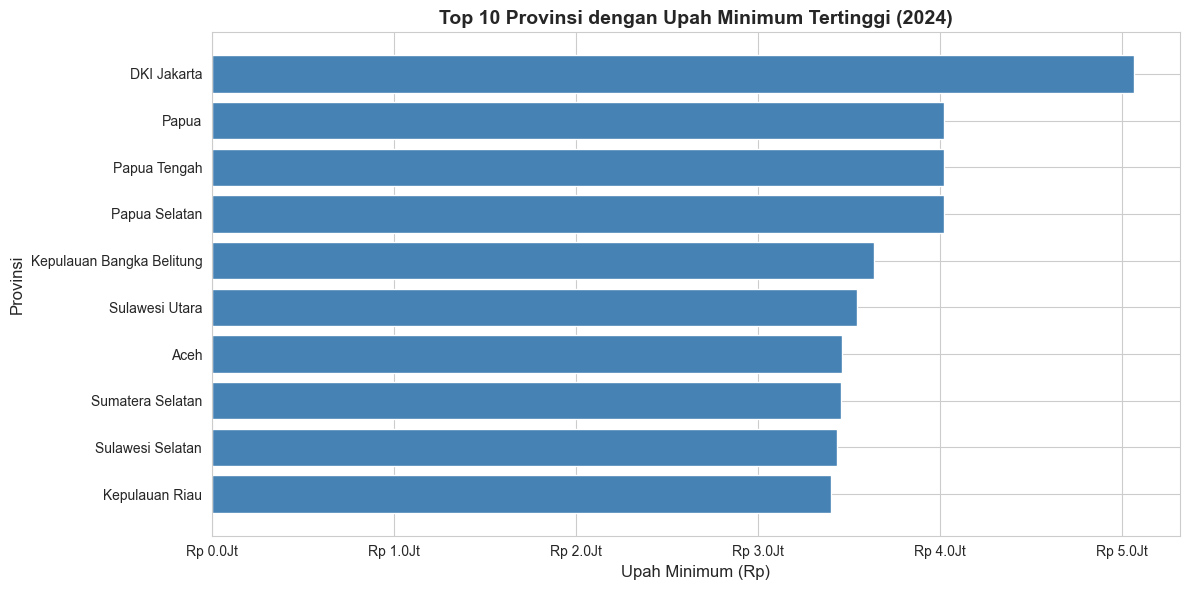

In [17]:
plt.figure(figsize=(12, 6))
df_2024 = df[df['Tahun'] == 2024]
top_10 = df_2024.nlargest(10, 'Upah Minimum (Rp)')[['Provinsi', 'Upah Minimum (Rp)']].sort_values('Upah Minimum (Rp)')
plt.barh(top_10['Provinsi'], top_10['Upah Minimum (Rp)'], color='steelblue')
plt.xlabel('Upah Minimum (Rp)', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)
plt.title('Top 10 Provinsi dengan Upah Minimum Tertinggi (2024)', fontsize=14, fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'Rp {x/1e6:.1f}Jt'))
plt.tight_layout()
plt.savefig('top_10_UMP 2024.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

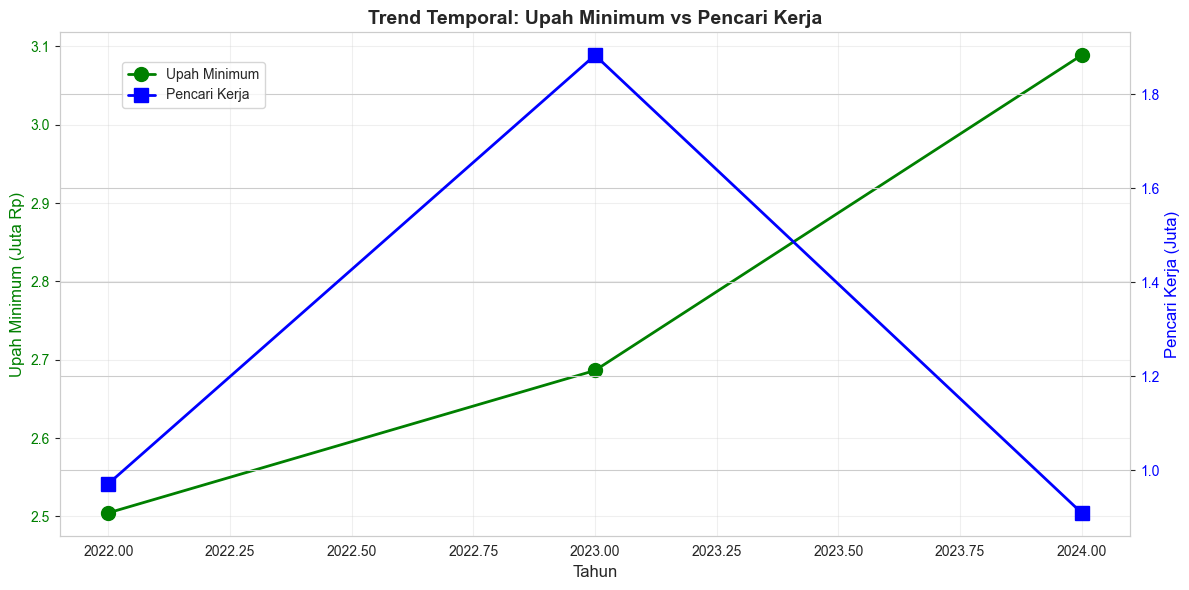

In [18]:
plt.figure(figsize=(12, 6))

trend_upah = df.groupby('Tahun')['Upah Minimum (Rp)'].mean()
trend_pencari = df.groupby('Tahun')['Pencari Kerja Terdaftar - Jumlah'].sum() / 1e6
trend_lowongan = df.groupby('Tahun')['Lowongan Kerja Terdaftar - Jumlah'].sum() / 1e3

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(trend_upah.index, trend_upah.values/1e6, marker='o', linewidth=2, 
        markersize=10, label='Upah Minimum (Million Rp)', color='green')
ax1.set_xlabel('Tahun', fontsize=12)
ax1.set_ylabel('Upah Minimum (Juta Rp)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(trend_pencari.index, trend_pencari.values, marker='s', linewidth=2, 
        markersize=10, label='Pencari Kerja (Million)', color='blue')
ax2.set_ylabel('Pencari Kerja (Juta)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Trend Temporal: Upah Minimum vs Pencari Kerja', fontsize=14, fontweight='bold')
fig.legend(['Upah Minimum', 'Pencari Kerja'], loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.savefig('trend_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

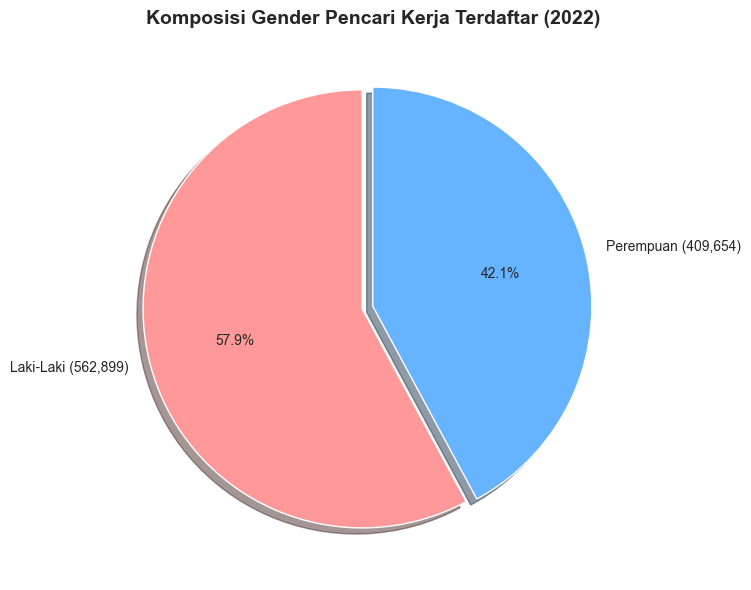

In [20]:
df_2024 = df[df['Tahun'] == 2022]
total_male = df_2024['Pencari Kerja Terdaftar - Laki-Laki'].sum()
total_female = df_2024['Pencari Kerja Terdaftar - Perempuan'].sum()

plt.figure(figsize=(8, 6))
sizes = [total_male, total_female]
labels = [f'Laki-Laki ({total_male:,.0f})', f'Perempuan ({total_female:,.0f})']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
       startangle=90, explode=explode, shadow=True)
plt.title('Komposisi Gender Pencari Kerja Terdaftar (2022)', 
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pie_chart_gender_2022.png', dpi=300, bbox_inches='tight')
plt.show()

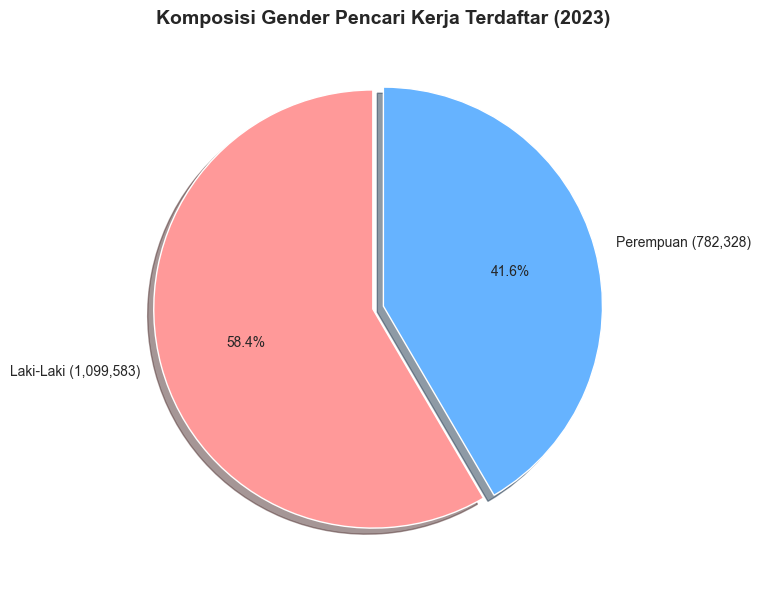

In [22]:
df_2024 = df[df['Tahun'] == 2023]
total_male = df_2024['Pencari Kerja Terdaftar - Laki-Laki'].sum()
total_female = df_2024['Pencari Kerja Terdaftar - Perempuan'].sum()

plt.figure(figsize=(8, 6))
sizes = [total_male, total_female]
labels = [f'Laki-Laki ({total_male:,.0f})', f'Perempuan ({total_female:,.0f})']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
       startangle=90, explode=explode, shadow=True)
plt.title('Komposisi Gender Pencari Kerja Terdaftar (2023)', 
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pie_chart_gender_2023.png', dpi=300, bbox_inches='tight')
plt.show()

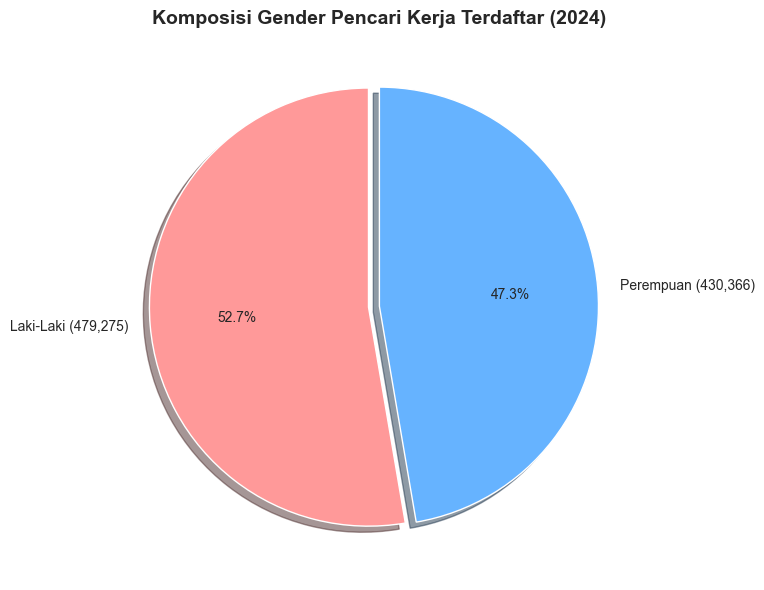

In [23]:
df_2024 = df[df['Tahun'] == 2024]
total_male = df_2024['Pencari Kerja Terdaftar - Laki-Laki'].sum()
total_female = df_2024['Pencari Kerja Terdaftar - Perempuan'].sum()

plt.figure(figsize=(8, 6))
sizes = [total_male, total_female]
labels = [f'Laki-Laki ({total_male:,.0f})', f'Perempuan ({total_female:,.0f})']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
       startangle=90, explode=explode, shadow=True)
plt.title('Komposisi Gender Pencari Kerja Terdaftar (2024)', 
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pie_chart_gender_2024.png', dpi=300, bbox_inches='tight')
plt.show()

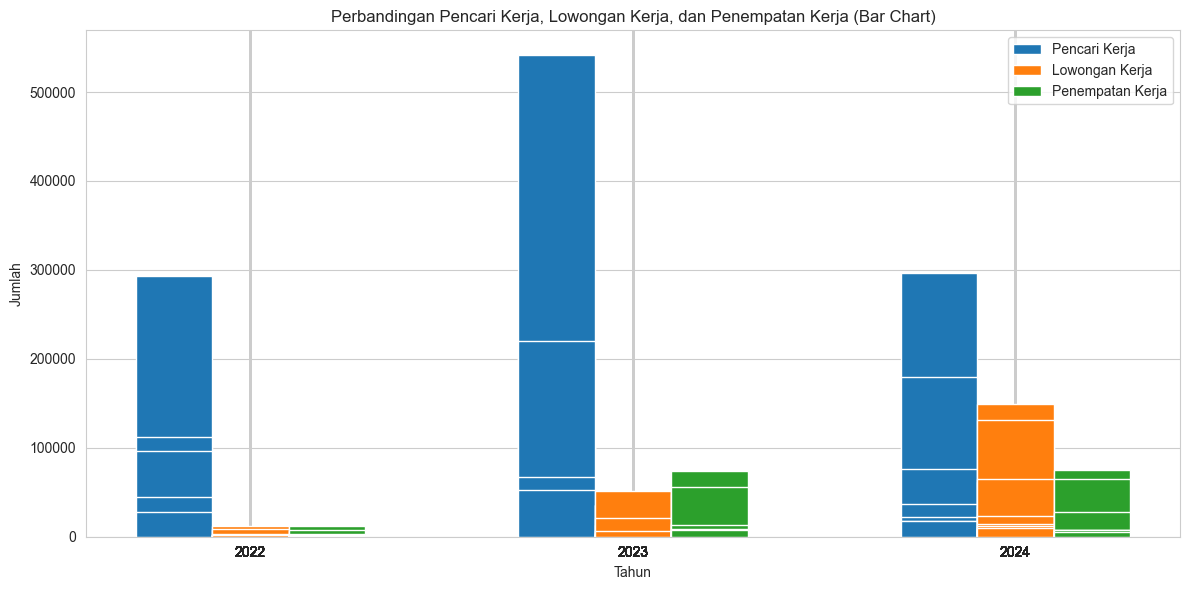

In [7]:
data_visualisasi = pd.read_excel("Data_gabungan_Completed_sorted_by_tahun.xlsx")

data_visualisasi['Tahun'] = data_visualisasi['Tahun'].astype(int)

data_visualisasi_tahun = data_visualisasi.groupby("Tahun", as_index=False).agg({
    "Pencari Kerja Terdaftar - Jumlah": "sum",
    "Lowongan Kerja Terdaftar - Jumlah": "sum",
    "Penempatan/Pemenuhan Tenaga Kerja - Jumlah": "sum"
})

plt.figure(figsize=(12,6))

plt.bar(data_visualisasi['Tahun'] - 0.2,
        data_visualisasi['Pencari Kerja Terdaftar - Jumlah'],
        width=0.2, label='Pencari Kerja')

plt.bar(data_visualisasi['Tahun'],
        data_visualisasi['Lowongan Kerja Terdaftar - Jumlah'],
        width=0.2, label='Lowongan Kerja')

plt.bar(data_visualisasi['Tahun'] + 0.2,
        data_visualisasi['Penempatan/Pemenuhan Tenaga Kerja - Jumlah'],
        width=0.2, label='Penempatan Kerja')

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Perbandingan Pencari Kerja, Lowongan Kerja, dan Penempatan Kerja (Bar Chart)")

plt.xticks(data_visualisasi['Tahun'])

plt.legend()
plt.tight_layout()
plt.savefig("bar_chart_pencari_kerja_lowongan_dan_penempatan.png", dpi=300, bbox_inches='tight')
plt.show()


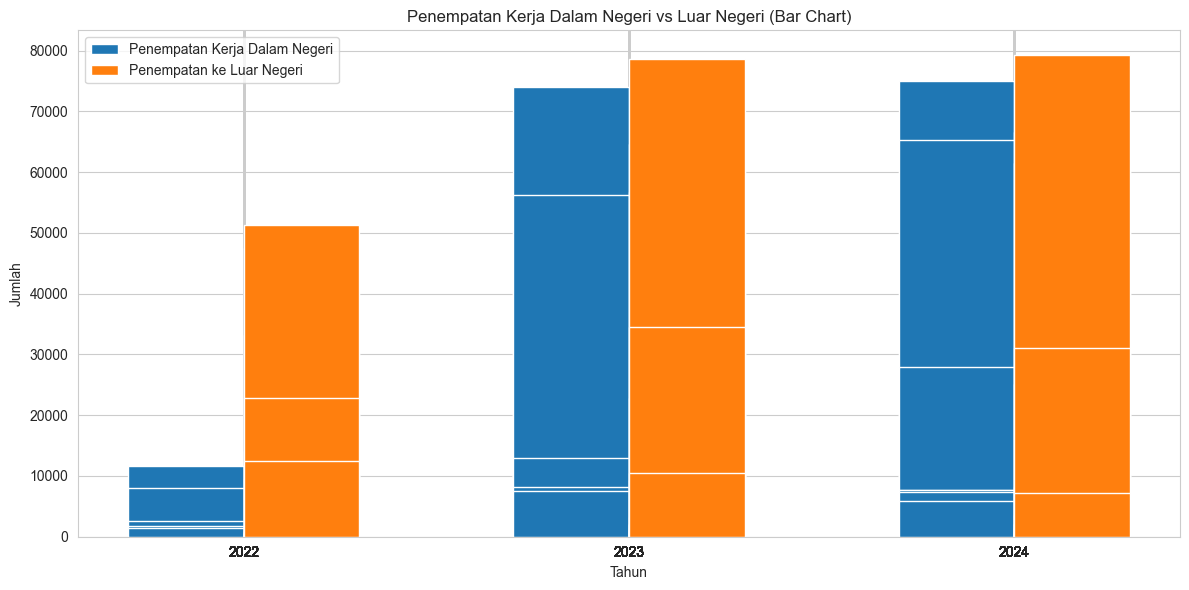

In [10]:
data_visualisasi = pd.read_excel("Data_gabungan_Completed_sorted_by_tahun.xlsx")

data_visualisasi['Tahun'] = data_visualisasi['Tahun'].astype(int)

data_visualisasi_tahun = data_visualisasi.groupby("Tahun", as_index=False).agg({
    "Penempatan/Pemenuhan Tenaga Kerja - Jumlah": "sum",
    "Penempatan": "sum"
})

plt.figure(figsize=(12,6))

plt.bar(data_visualisasi['Tahun'] - 0.15,
        data_visualisasi['Penempatan/Pemenuhan Tenaga Kerja - Jumlah'],
        width=0.3, label="Penempatan Kerja Dalam Negeri")

plt.bar(data_visualisasi['Tahun'] + 0.15,
        data_visualisasi['Penempatan'],
        width=0.3, label="Penempatan ke Luar Negeri")

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Penempatan Kerja Dalam Negeri vs Luar Negeri (Bar Chart)")

plt.xticks(data_visualisasi['Tahun'])

plt.legend()
plt.tight_layout()
plt.savefig("bar_chart_penempatan_luar_negeri_vs_dalam_negeri", dpi=300, bbox_inches='tight')
plt.show()